In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

from pointnet_cls import get_model
from get_modelnet40 import read_off

In [22]:
with open("car_0198.off", 'r') as f:
    P, _ = read_off(f)
P = np.array(P)
P.shape

(22577, 3)

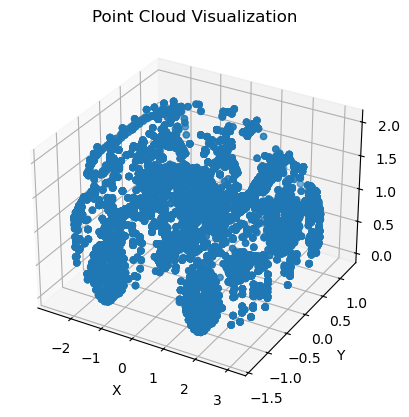

In [23]:
# Extract x, y, and z coordinates from the point cloud
plt.ion()

x = P[:, 0]
y = P[:, 1]
z = P[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud Visualization')

# Show plot
plt.show()

# Keep the plot window open
plt.show(block=True)

In [24]:
model = get_model(k=40, normal_channel=False, feature_transform=False)
print(P.transpose(2, 1).shape)
logits, T_3, T_64 = model(P.transpose(2, 1))

add_ones = torch.ones(P.shape[0], P.shape[1], 1) # B x N x 1
P_ones = torch.cat((P, add_ones), dim=2) # B x N x 4

P_trans = torch.bmm(P_ones, T_3) # B x N x 4
P_trans = P_trans[:, :, :3] # B x N x 3

AxisError: axis 2 is out of bounds for array of dimension 2

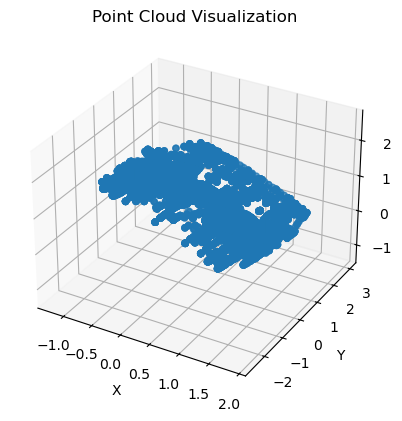

In [ ]:
P_trans_0_numpy = P_trans[0].detach().numpy()

# Extract x, y, and z coordinates from the point cloud
x = P_trans_0_numpy[:, 0]
y = P_trans_0_numpy[:, 1]
z = P_trans_0_numpy[:, 2]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Point Cloud Visualization')

# Show plot
plt.show()